In [2]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from collections import Counter
from plotly.subplots import make_subplots


In [3]:
from IPython.display import HTML

HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
 } else {
 $('div.input').show();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code show/hide"></form>''')

# eICU

In [6]:
# Upload files
readm_sourses= pd.read_csv ('Readmission_sourses.csv')
readm_sourses['num_of_sourse'] = list(range(readm_sourses.shape[0]))
readm_1st_move= pd.read_csv ('Readm_1move.csv')
readm_2st_move= pd.read_csv ('Readm_2move.csv')
discharge= pd.read_csv ('discharge.csv')

In [7]:
def res_name_2_num(res_name):
    return readm_sourses['num_of_sourse'][readm_sourses['source_name']==res_name].values[0]    

In [8]:
sourses_from_num=list(readm_1st_move['hospitalid'].apply(res_name_2_num))
sourses_to_num=list(readm_1st_move['unittype_1'].apply(res_name_2_num))

sourses_from_num_2=list(readm_2st_move['unittype_1'].apply(res_name_2_num))
sourses_to_num_2=list(readm_2st_move['unittype_2'].apply(res_name_2_num))

discharge_from=list(discharge['unittype_2'].apply(res_name_2_num))
discharge_to=list(discharge['unitdischargelocation_2'].apply(res_name_2_num))

In [9]:
def res_name_2_num_mimic(res_name):
    return readm_sourses_mimic['num_of_sourse'][readm_sourses_mimic['source_name']==res_name].values[0]        
       

In [10]:
readm_1st_move['sourses_from_num']=sourses_from_num
readm_1st_move['sourses_to_num']=sourses_to_num
readm_2st_move['sourses_from_num_2']=sourses_from_num_2
readm_2st_move['sourses_to_num_2']=sourses_to_num_2
discharge['discharge_from']=discharge_from
discharge['discharge_to']=discharge_to

# Scheme of transfers between first and second admission to ICU (eICU dataset).

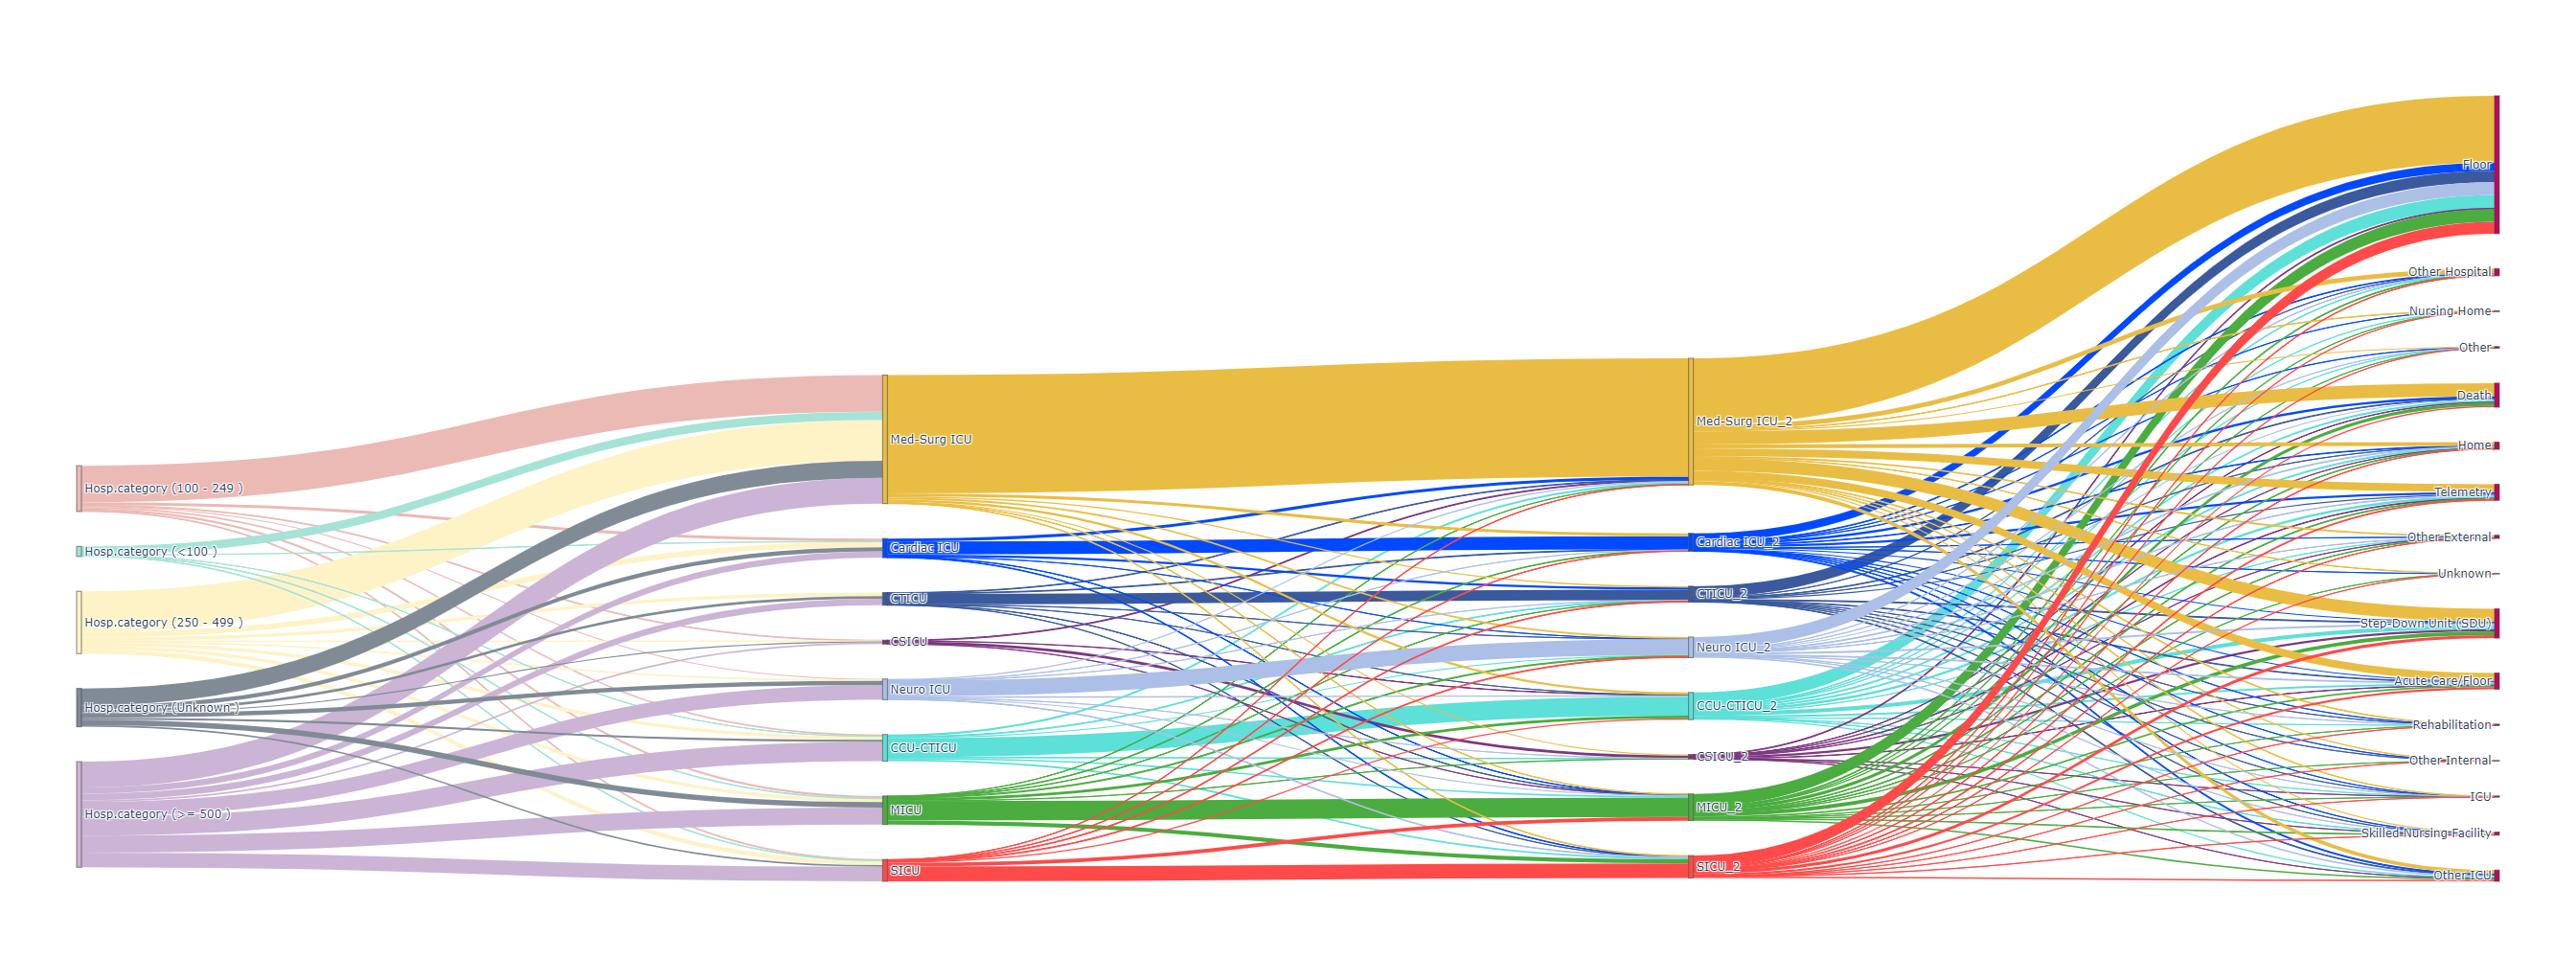

In [11]:
color_node = ['#EBBAB5', '#FEF3C7', '#A6E3D7', '#CBB4D5','#808B96',   
              '#7D3780', '#E9BD43', '#5CE0D8', '#0049FF', '#ACBFE6', '#4BAC3F',  '#FE4A49', '#3b5a9d',
              '#7D3780', '#E9BD43', '#ACBFE6', '#0049FF',  '#5CE0D8',  '#4BAC3F',  '#FE4A49', '#3b5a9d',
              '#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C','#C0055C'] 

color_link = ['#EBBAB5', '#FEF3C7', '#A6E3D7', '#CBB4D5','#808B96',
              '#7D3780', '#E9BD43', '#5CE0D8', '#0049FF', '#ACBFE6', '#4BAC3F',  '#FE4A49', '#3b5a9d',
              '#7D3780', '#E9BD43', '#ACBFE6', '#0049FF',  '#5CE0D8',  '#4BAC3F',  '#FE4A49', '#3b5a9d',]
        
label = list(readm_sourses['source_name'])
source=list(readm_1st_move['sourses_from_num'])
source.extend(list(readm_2st_move['sourses_from_num_2']))
source.extend(list(discharge['discharge_from']))

colour_list_link=[]
for i in Counter(source).keys():
    for k in range(source.count(i)):
        colour_list_link.append(color_link[i])
        
target=list(readm_1st_move['sourses_to_num'])
target.extend(list(readm_2st_move['sourses_to_num_2']))
target.extend(list(discharge['discharge_to']))

value=list(readm_1st_move['num_of_admissions_1'])
value.extend(list(readm_2st_move['num_of_admissions_2']))
value.extend(list(discharge['num_of_discharge']))



link = dict(source = source, target = target, value = value, color=colour_list_link)
node = dict(label = label, pad=50, thickness=5, color=color_node)
data = go.Sankey(link = link, node=node,valueformat = ".0f",)

# plot
fig = go.Figure(data)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

In [29]:
readmission_rate_by_unittype_eICU= pd.read_csv ('eICU_readmission_rate_by_unittype.csv')
readmission_rate_by_hosp_category_eICU= pd.read_csv ('eICU_readmission_rate_by_hosp_category.csv')
readmission_rate_by_hospitals_eICU= pd.read_csv ('eICU_readmission_rate_by_hospitals.csv')
readmission_rate_by_apachedxgroup_eICU= pd.read_csv('readmission_rate_by_apachedxgroup_eICU.csv')
readmission_rate_by_hospitals_id_eICU= pd.read_csv('eICU_readmission_rate_by_hospitals_id.csv')


In [30]:
readmission_rate_by_unittype_eICU_plot=readmission_rate_by_unittype_eICU.rename(columns={"num_of_cases_without_readm": "non_readm", "num_of_cases_readmission": "readm"})
readmission_rate_by_hosp_category_eICU_plot=readmission_rate_by_hosp_category_eICU.rename(columns={"num_of_cases_without_readm": "non_readm", "num_of_cases_readmission": "readm"})
readmission_rate_by_hospitals_eICU_plot=readmission_rate_by_hospitals_eICU.rename(columns={"num_of_cases_without_readm": "non_readm", "num_of_cases_readmission": "readm"})
readmission_rate_by_apachedxgroup_eICU_plot=readmission_rate_by_apachedxgroup_eICU.rename(columns={"num_of_cases_without_readm": "non_readm", "num_of_cases_readmission": "readm"})
readmission_rate_by_hospitals_id_eICU_plot=readmission_rate_by_hospitals_id_eICU.rename(columns={"num_of_cases_without_readm": "non_readm", "num_of_cases_readmission": "readm"})

In [14]:
readmission_rate_by_apachedxgroup_eICU_plot

apachedxgroup  non_readm  readm  all_cases  perc
0      GIObstruction       1210     88       1298  6.78
1                CHF       5756    338       6094  5.55
2             Sepsis      17404    972      18376  5.29
3       RespMedOther       8024    425       8449  5.03
4                PNA       4517    236       4753  4.97
5            GIBleed       7384    379       7763  4.88
6            CVOther       3895    188       4083  4.60
7                ARF       1947     92       2039  4.51
8              Neuro       4845    223       5068  4.40
9              Other      29411   1201      30612  3.92
10               ACS       8918    360       9278  3.88
11              Coma       2183     87       2270  3.83
12     Asthma-Emphys       4141    163       4304  3.79
13     CardiacArrest       9257    344       9601  3.58
14            Trauma       5978    212       6190  3.42
15               CVA       9948    336      10284  3.27
16           ValveDz       3017     98       3115  3.15
17  ChestPainUnknown        872     28        900  3.11
18              CABG       5000    148       5148  2.87
19               DKA       4684     54       4738  1.14
20          Overdose       4597     49       4646  1.05

# Readmission by type of ICU. eICU

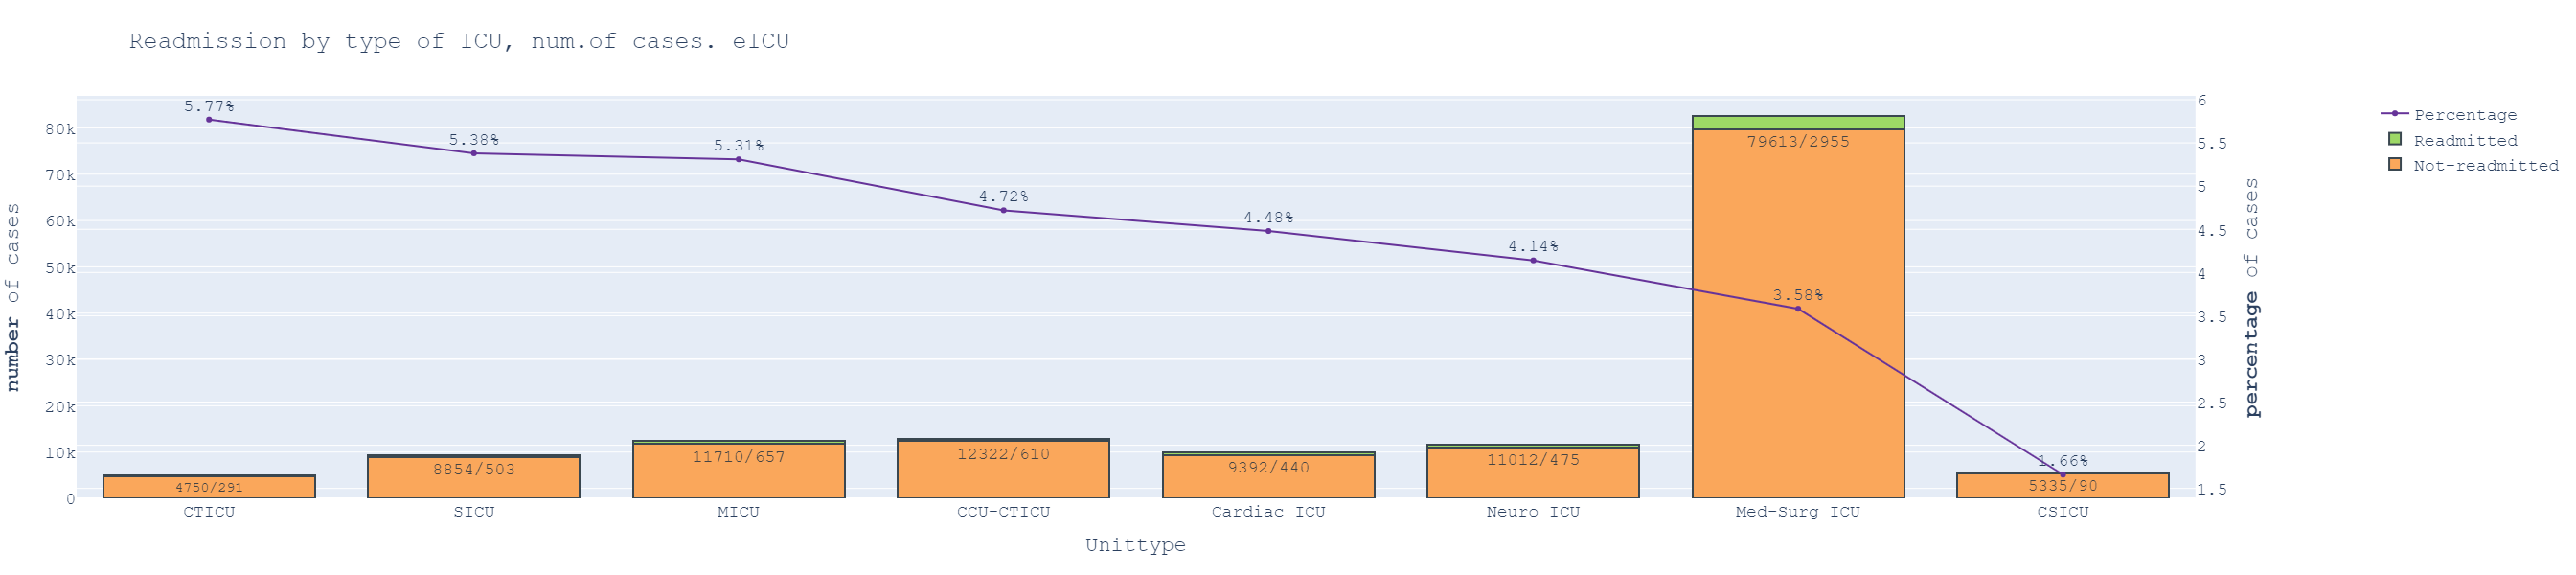

In [17]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(
    y=readmission_rate_by_unittype_eICU_plot.non_readm,
    x=readmission_rate_by_unittype_eICU_plot.unittype,
    name='Not-readmitted',
    text=list(readmission_rate_by_unittype_eICU_plot.non_readm.astype(str)+'/'+readmission_rate_by_unittype_eICU_plot.readm.astype(str)),
    #orientation='h',
    marker=dict(
        color='#FAA75B',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=2)
    )
))
fig.add_trace(go.Bar(
    y=readmission_rate_by_unittype_eICU_plot.readm,
    x=readmission_rate_by_unittype_eICU_plot.unittype,
    #text=list(readmission_rate_by_unittype_eICU_plot.readm),
    #textposition="insid",
    name='Readmitted',
    #orientation='h',
    marker=dict(
        color='#9DD866',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=2)
    )
))

fig.update_layout(barmode='stack')

fig.add_trace(go.Scatter(
    x=readmission_rate_by_unittype_eICU_plot['unittype'],
    y=readmission_rate_by_unittype_eICU_plot['perc'],
    line=dict(color="RebeccaPurple"),
    name='Percentage',
    text= list(readmission_rate_by_unittype_eICU_plot['perc'].astype(str)+'%'),   
    mode="lines+markers+text",
    textposition="top center"
    #connectgaps=True # override default to connect the gaps
),secondary_y=True,)

# Set y-axes titles
fig.update_yaxes(title_text="<b>number</b> of cases", secondary_y=False)
fig.update_yaxes(title_text="<b>percentage</b> of cases", secondary_y=True)

fig.update_layout(height=600,
    title="Readmission by type of ICU, num.of cases. eICU",
    xaxis_title="Unittype",
    #yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
    )
)

# Readmission by hospital category. eICU

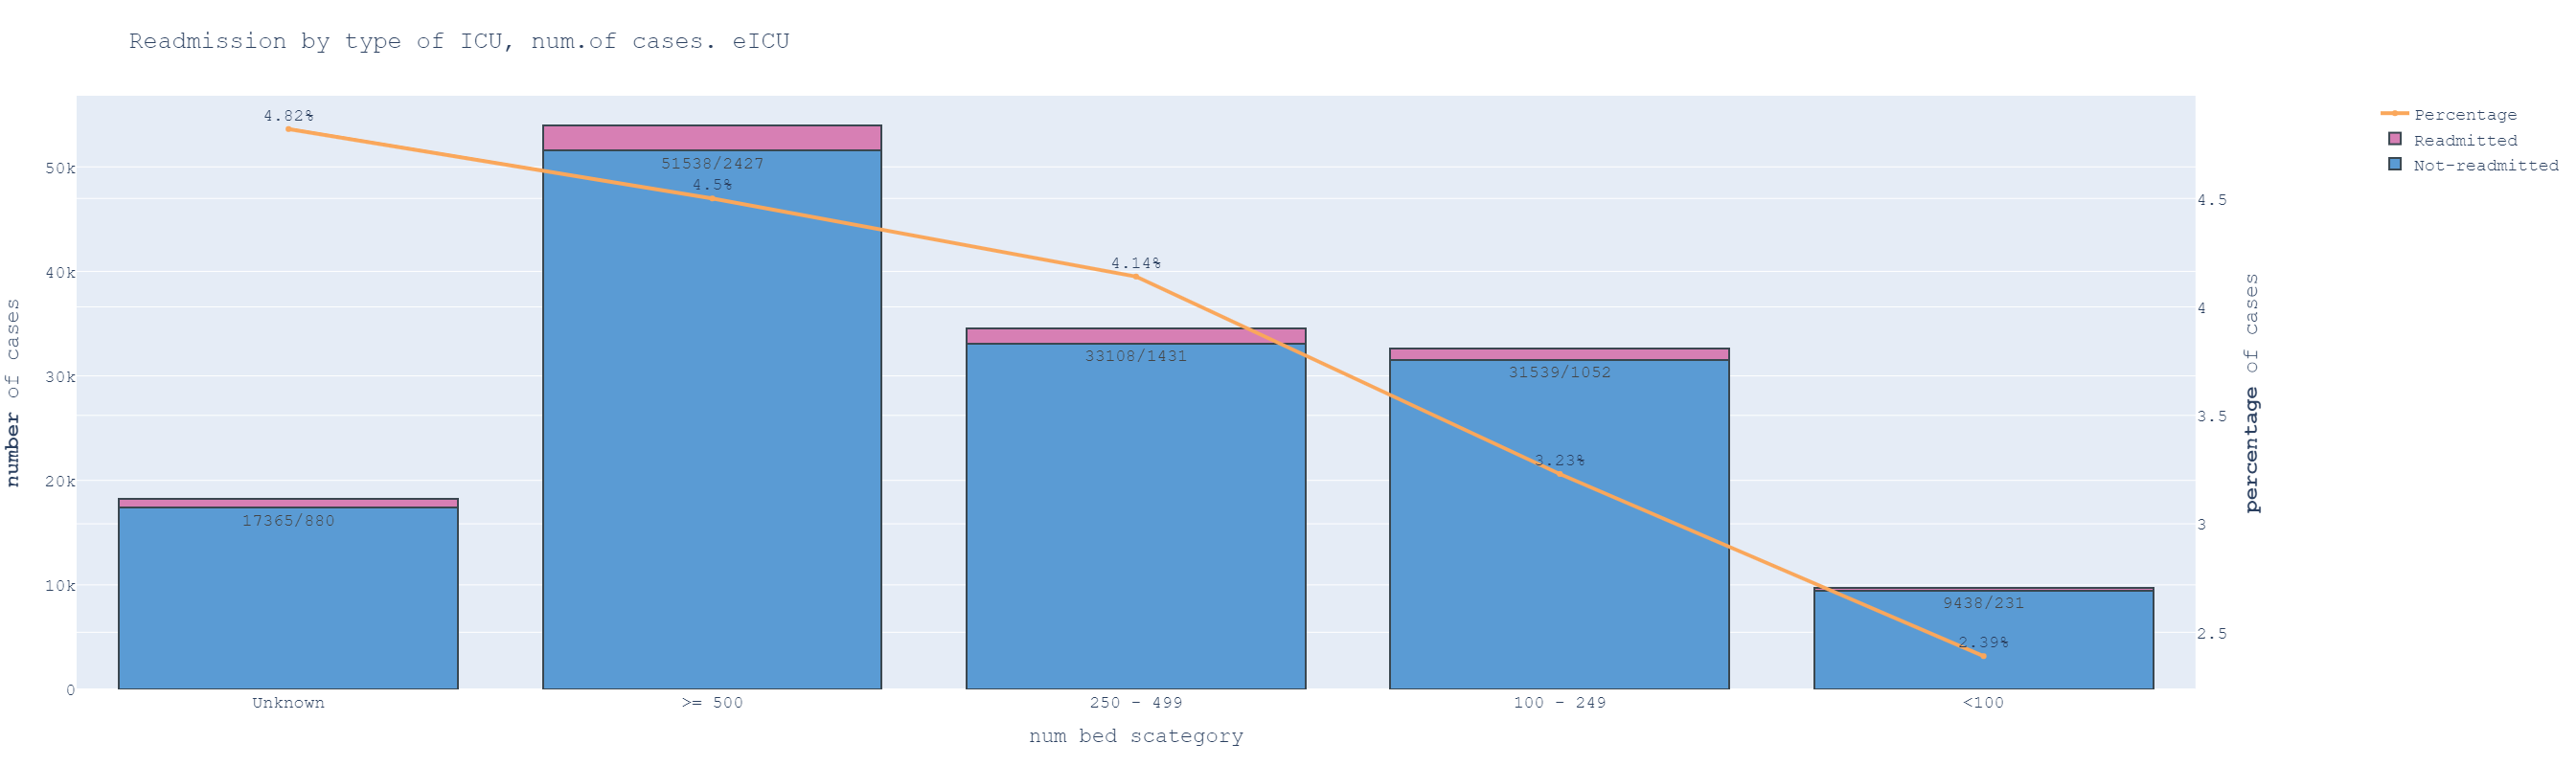

In [24]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(
    y=readmission_rate_by_hosp_category_eICU_plot.non_readm,
    x=readmission_rate_by_hosp_category_eICU_plot.numbedscategory,
    name='Not-readmitted',
    text=list(readmission_rate_by_hosp_category_eICU_plot.non_readm.astype(str)+'/'+readmission_rate_by_hosp_category_eICU_plot.readm.astype(str)),
    #orientation='h',
    marker=dict(
        color="#5A9BD4",#'rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=2)
    )
))
fig.add_trace(go.Bar(
    y=readmission_rate_by_hosp_category_eICU_plot.readm,
    x=readmission_rate_by_hosp_category_eICU_plot.numbedscategory,
    #text=list(readmission_rate_by_unittype_eICU_plot.readm),
    #textposition="insid",
    name='Readmitted',
    #orientation='h',
    marker=dict(
        color='#D77FB4',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=2)
    )
))

fig.update_layout(barmode='stack')

fig.add_trace(go.Scatter(
    x=readmission_rate_by_hosp_category_eICU_plot['numbedscategory'],
    y=readmission_rate_by_hosp_category_eICU_plot['perc'],
    line=dict(color='#FAA75B', width=4),
    name='Percentage',
    text=list(readmission_rate_by_hosp_category_eICU_plot['perc'].astype(str)+'%'),
    mode="lines+markers+text",
    textposition="top center"
    #connectgaps=True # override default to connect the gaps
),secondary_y=True,)

# Set y-axes titles
fig.update_yaxes(title_text="<b>number</b> of cases", secondary_y=False)
fig.update_yaxes(title_text="<b>percentage</b> of cases", secondary_y=True)

fig.update_layout(height=800,
    title="Readmission by num beds category, num.of cases. eICU",
    xaxis_title="num bed scategory",
    #yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
    )
)

# Readmission by apachedxgroup category. eICU

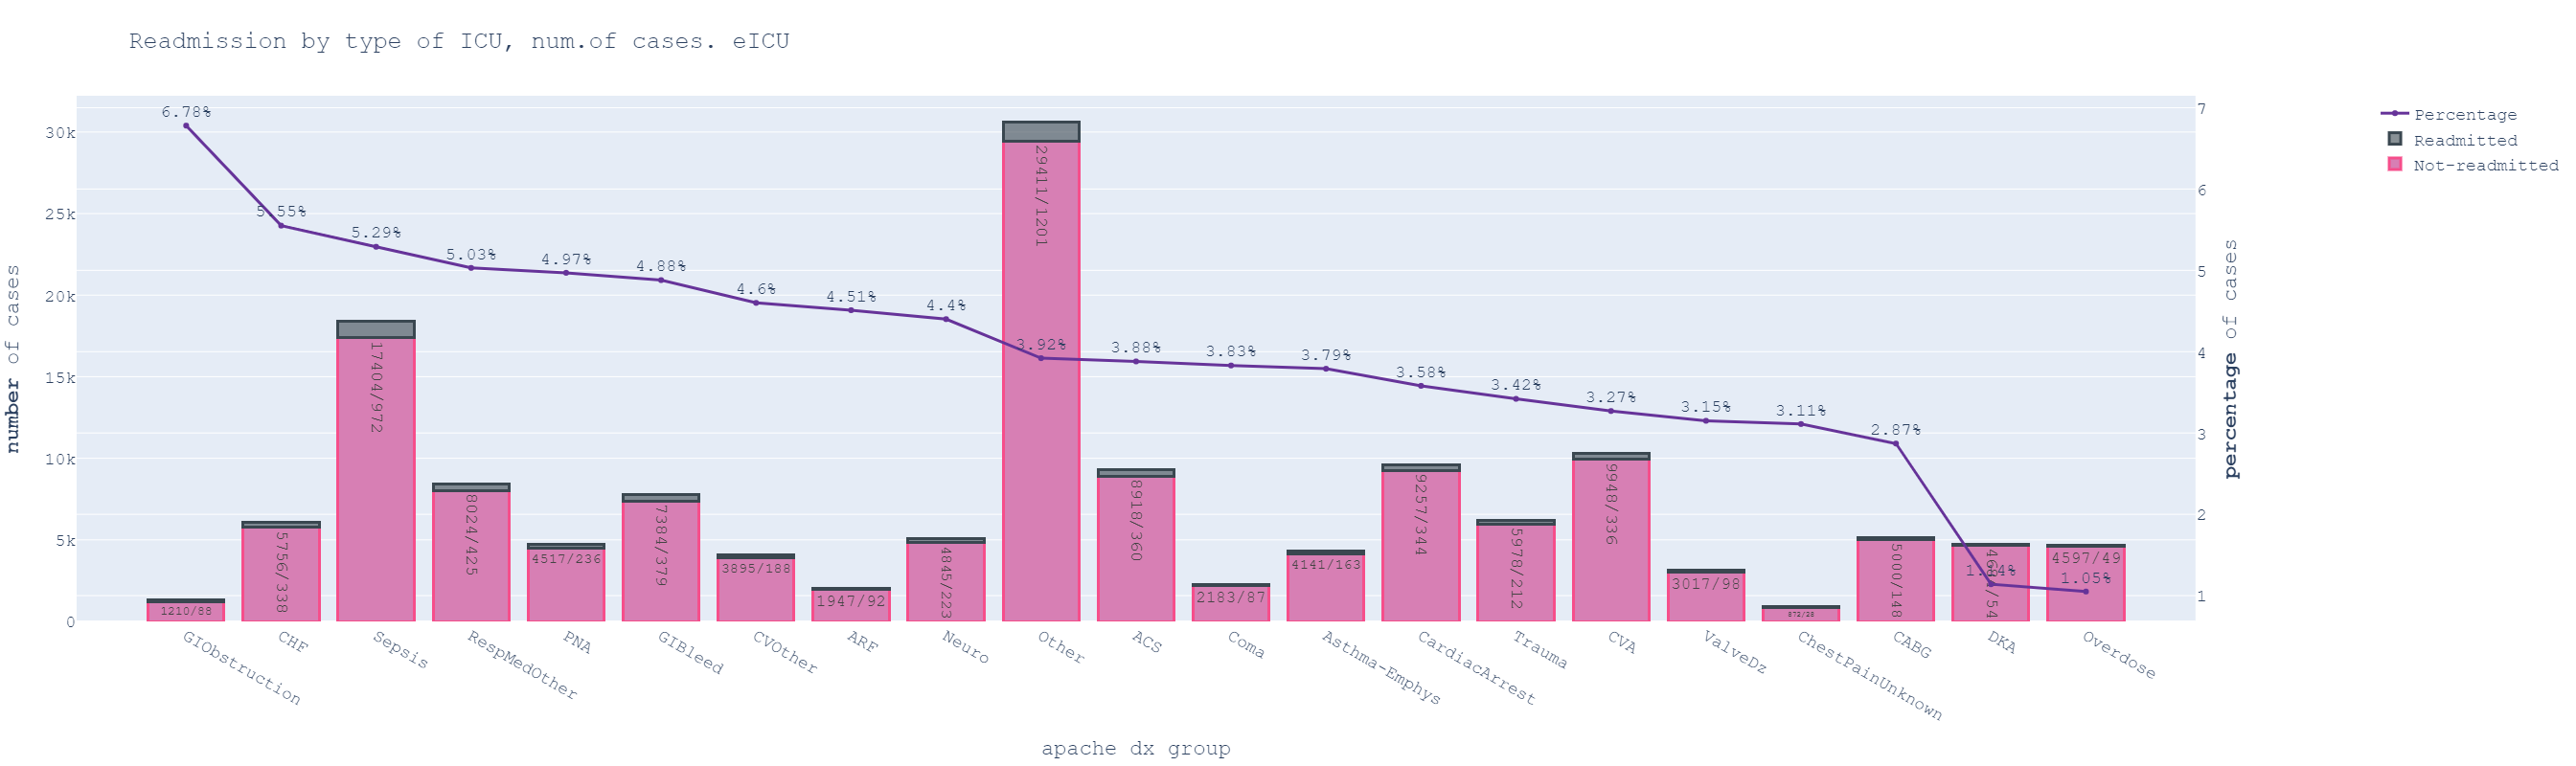

In [28]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(
    y=readmission_rate_by_apachedxgroup_eICU_plot.non_readm,
    x=readmission_rate_by_apachedxgroup_eICU_plot.apachedxgroup,
    name='Not-readmitted',
    text=list(readmission_rate_by_apachedxgroup_eICU_plot.non_readm.astype(str)+'/'+readmission_rate_by_apachedxgroup_eICU_plot.readm.astype(str)),
    #orientation='h',
    marker=dict(
        color="#D77FB4",#'rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=readmission_rate_by_apachedxgroup_eICU_plot.readm,
    x=readmission_rate_by_apachedxgroup_eICU_plot.apachedxgroup,
    #text=list(readmission_rate_by_unittype_eICU_plot.readm),
    #textposition="insid",
    name='Readmitted',
    #orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')

fig.add_trace(go.Scatter(
    x=readmission_rate_by_apachedxgroup_eICU_plot['apachedxgroup'],
    y=readmission_rate_by_apachedxgroup_eICU_plot['perc'],
    line=dict(color="RebeccaPurple", width=3),
    name='Percentage',
    text=list(readmission_rate_by_apachedxgroup_eICU_plot['perc'].astype(str)+'%'),
    mode="lines+markers+text",
    textposition="top center"
    #connectgaps=True # override default to connect the gaps
),secondary_y=True,)

# Set y-axes titles
fig.update_yaxes(title_text="<b>number</b> of cases", secondary_y=False)
fig.update_yaxes(title_text="<b>percentage</b> of cases", secondary_y=True)

fig.update_layout(height=800,
    title="Readmission by apache dx group, num.of cases. eICU",
    xaxis_title="apache dx group",
    #yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
    )
)

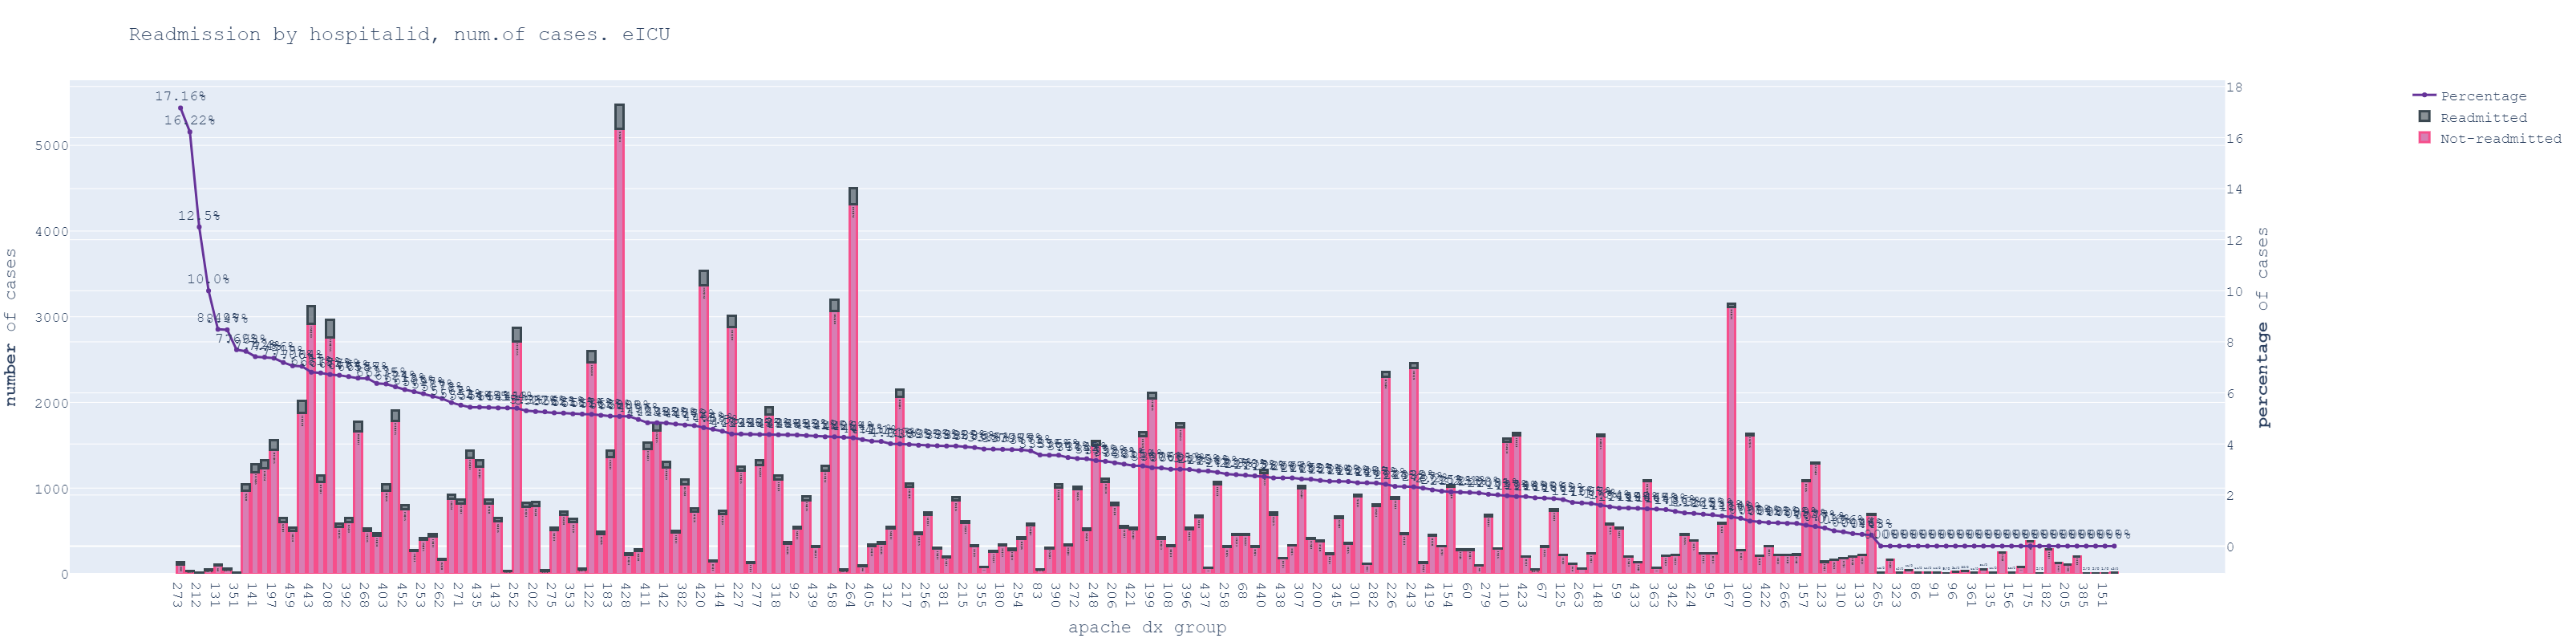

In [32]:

fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(
    y=readmission_rate_by_hospitals_id_eICU_plot.non_readm,
    x=readmission_rate_by_hospitals_id_eICU_plot.hospitalid.astype(str),
    name='Not-readmitted',
    text=list(readmission_rate_by_hospitals_id_eICU_plot.non_readm.astype(str)+'/'+readmission_rate_by_hospitals_id_eICU_plot.readm.astype(str)),
    #orientation='h',
    marker=dict(
        color="#D77FB4",#'rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=readmission_rate_by_hospitals_id_eICU_plot.readm,
    x=readmission_rate_by_hospitals_id_eICU_plot.hospitalid.astype(str),
    #text=list(readmission_rate_by_unittype_eICU_plot.readm),
    #textposition="insid",
    name='Readmitted',
    #orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')

fig.add_trace(go.Scatter(
    x=readmission_rate_by_hospitals_id_eICU_plot['hospitalid'].astype(str),
    y=readmission_rate_by_hospitals_id_eICU_plot['perc'],
    line=dict(color="RebeccaPurple", width=3),
    name='Percentage',
    text=list(readmission_rate_by_hospitals_id_eICU_plot['perc'].astype(str)+'%'),
    mode="lines+markers+text",
    textposition="top center"
    #connectgaps=True # override default to connect the gaps
),secondary_y=True,)

# Set y-axes titles
fig.update_yaxes(title_text="<b>number</b> of cases", secondary_y=False)
fig.update_yaxes(title_text="<b>percentage</b> of cases", secondary_y=True)

fig.update_layout(height=800,
    title="Readmission by hospitalid, num.of cases. eICU",
    xaxis_title="apache dx group",
    #yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
    )
)